# Phase 3: Advanced Analysis (GPA & Course/Professor Insights)

In this notebook, we dig deeper into the data:
1. Analyze **course difficulty** via average GPA, GPA variance, and time trends.
2. Compare **professor** differences (for courses taught by multiple professors).
3. Explore **term/quarter** effects on GPA.
4. Examine **grade letter distributions** (A/B/C/F proportions).
5. (Placeholder) Drop Rate analysis (if data becomes available).
6. Optionally cluster or categorize courses based on their GPA patterns.
7. Summarize actionable insights for students making course decisions.

At this stage, we assume:
- We have loaded the cleaned data from `01_phase1_data_cleaning.ipynb` (pickled in `cleaned_grades.pkl`).
- There is no drop-rate column in the data yet. We'll focus on GPA-based insights.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Load the cleaned data from Phase 1
data_file = os.path.join("..", "data", "cleaned_grades.pkl")
df = pd.read_pickle(data_file)

print("Loaded cleaned DataFrame from Phase 1:")
print(f"Shape: {df.shape}")
display(df.head(5))

# Filter out only computable rows for GPA analyses
df_computable = df[df["gpa_status"] == "computable"].copy()
print(f"\nComputable GPA rows: {len(df_computable)}")

Loaded cleaned DataFrame from Phase 1:
Shape: (9454, 10)


,Submission time,User ID,Term,Course,Professor,Grade distribution,Recommend professor?,enhanced_grade_dict,enhanced_calculated_gpa,gpa_status
0,2023-12-23T05:50:18.840Z,b144031aa5f07b5677aa3431b98f674d,Fall Qtr 2023,CSE 120,"Voelker, Geoffrey M.","A+:11, A:41, A-:25, B+:41, B:28, B-:16, C+:12,...",NaN,"{'a+': 11, 'a': 41, 'a-': 25, 'b+': 41, 'b': 2...",3.137864,computable
1,2023-12-23T05:50:18.840Z,b144031aa5f07b5677aa3431b98f674d,Fall Qtr 2023,CSE 132A,"Vianu, Victor Dan","A+:4, A:23, A-:19, B+:40, B:15, B-:27, C+:15, ...",NaN,"{'a+': 4, 'a': 23, 'a-': 19, 'b+': 40, 'b': 15...",2.966463,computable
2,2023-12-23T05:50:18.840Z,b144031aa5f07b5677aa3431b98f674d,Fall Qtr 2023,CSE 141L,"Eldon, John","A+:1, A:28, A-:4, B+:2, B:0, B-:3, C+:0, C:3, ...",NaN,"{'a+': 1, 'a': 28, 'a-': 4, 'b+': 2, 'b': 0, '...",3.366667,computable
3,2023-12-23T05:50:18.840Z,b144031aa5f07b5677aa3431b98f674d,Fall Qtr 2023,CSE 167,"Li, Tzumao","A+:102, A:22, A-:11, B+:5, B:7, B-:6, C+:2, C:...",NaN,"{'a+': 102, 'a': 22, 'a-': 11, 'b+': 5, 'b': 7...",3.709756,computable
4,2023-12-23T05:50:18.840Z,b144031aa5f07b5677aa3431b98f674d,Fall Qtr 2023,CSE 230,"Jhala, Ranjit","A+:29, A:42, A-:26, B+:16, B:7, B-:1, C+:0, C:...",NaN,"{'a+': 29, 'a': 42, 'a-': 26, 'b+': 16, 'b': 7...",3.743443,computable



Computable GPA rows: 8664


Course-level GPA stats (showing bottom 10 by avg_gpa):


,avg_gpa,std_gpa,count
Course,,,
MATH 2,1.632258,0.045620,2
BIPN 140,1.921429,NaN,1
COGS 152,2.194118,NaN,1
MATH 3C,2.201124,0.723881,29
SE 110A,2.207895,NaN,1
SE 142,2.283333,NaN,1
ECE 141A,2.355556,0.000000,2
SE 101B,2.358696,NaN,1
ANBI 159,2.372222,NaN,1



Top 10 courses by avg_gpa:


,avg_gpa,std_gpa,count
Course,,,
ETHN 122,4.0,NaN,1
BIMM 194,4.0,0.0,7
MATH 250B,4.0,NaN,1
MUS 95E,4.0,0.0,34
MUS 95JC,4.0,0.0,2
RELI 2,4.0,0.0,2
POLI 175,4.0,0.0,2
MAE 94,4.0,0.0,3
CAT 124RS,4.0,0.0,2


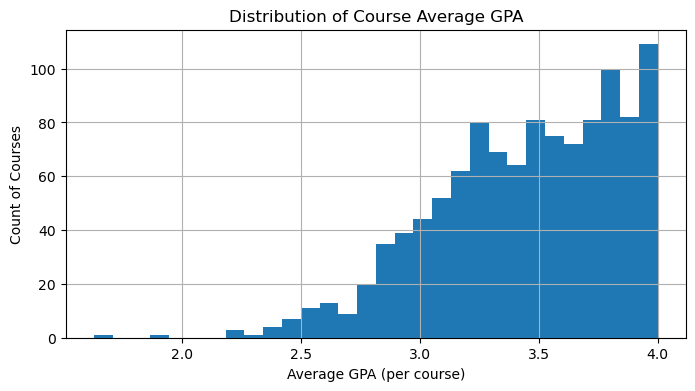

In [4]:
# 1) Analyze each course's average GPA, standard deviation, and distribution

# Compute average GPA and standard deviation for each course
course_stats = (df_computable
                .groupby("Course")["enhanced_calculated_gpa"]
                .agg(["mean", "std", "count"])
                .rename(columns={"mean": "avg_gpa", "std": "std_gpa"})
                .sort_values("avg_gpa", ascending=True))

print("Course-level GPA stats (showing bottom 10 by avg_gpa):")
display(course_stats.head(10))

print("\nTop 10 courses by avg_gpa:")
display(course_stats.tail(10))

# Plot a histogram of the average GPA distribution across courses
plt.figure(figsize=(8,4))
course_stats["avg_gpa"].hist(bins=30)
plt.title("Distribution of Course Average GPA")
plt.xlabel("Average GPA (per course)")
plt.ylabel("Count of Courses")
plt.show()

# This helps identify which courses have particularly low or high average GPA,
# plus the std_gpa column helps show how "scattered" the GPA is for each course.

Professor-level GPA stats (only those with >= 5 records). Lowest 10 by avg_gpa:


,avg_gpa,std_gpa,count
Professor,,,
"Hammock, Frances H",2.237249,0.697083,31
"Habib, Yousaf",2.254995,0.268245,11
"Delson, Nathan Joseph",2.297182,0.704223,9
"Mir Arabbaygi, Siavash",2.387565,0.311218,8
"Mohammadi, Amir",2.397110,0.547259,20
"Harel, Guershon",2.468996,0.310093,9
"Tirshfield, Jeffrey T",2.471218,0.096359,5
"He, Gaojin",2.477273,0.279272,5
"Oconnor, Joseph M.",2.480532,0.251613,7



Highest 10 by avg_gpa:


,avg_gpa,std_gpa,count
Professor,,,
"Cheng, Chung Kuan",3.964639,0.025404,12
"Ohnishi, Takae",3.968672,0.119228,27
"Dominguez, Ricardo",3.978049,0.000000,8
"Schaffer, Max Benjamin",3.978400,0.048299,5
"Kenley, Nicole",3.986842,0.024364,8
"Corrales, Joseph Bernales",3.989167,0.024224,5
"Jones, Michael David",3.990476,0.013041,5
"Iatarola, Briana Marie",3.992500,0.016036,8
"Taylor, Alexander Lawther",4.000000,0.000000,16


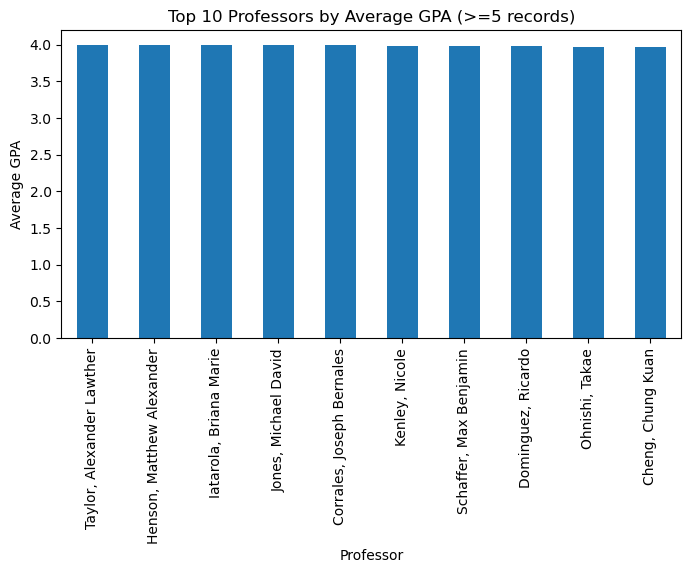

In [5]:
# 2) Compare professor differences: average GPA, maybe std as well

prof_stats = (df_computable
              .groupby("Professor")["enhanced_calculated_gpa"]
              .agg(["mean", "std", "count"])
              .rename(columns={"mean": "avg_gpa", "std": "std_gpa"}))

# For demonstration, let's filter to only those professors who have taught
# at least N records to avoid noise (example: N=5).
N = 5
prof_stats_filtered = prof_stats[prof_stats["count"] >= N].sort_values("avg_gpa")

print(f"Professor-level GPA stats (only those with >= {N} records). Lowest 10 by avg_gpa:")
display(prof_stats_filtered.head(10))

print("\nHighest 10 by avg_gpa:")
display(prof_stats_filtered.tail(10))

# Quick bar plot for top 10
top10_prof = prof_stats_filtered.tail(10).sort_values("avg_gpa", ascending=False)
top10_prof["avg_gpa"].plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Professors by Average GPA (>=5 records)")
plt.ylabel("Average GPA")
plt.show()

# This can help students see who tends to be strict vs. lenient,
# assuming consistent course difficulty or multi-term data.

Average GPA by Term:


Term
Fall Qtr 2019      3.251282
Fall Qtr 2020      3.404545
Fall Qtr 2021      3.303039
Fall Qtr 2022      3.322932
Fall Qtr 2023      3.259518
Fall Qtr 2024      3.324531
SpecSumSes 2021    3.573714
SpecSumSes 2022    3.443419
SpecSumSes 2023    3.644421
SpecSumSes 2024    3.218571
Spring Qtr 2020    3.610304
Spring Qtr 2021    3.438876
Spring Qtr 2022    3.229949
Spring Qtr 2023    3.272527
Spring Qtr 2024    3.276135
Sum Ses I 2020     3.407139
Sum Ses I 2021     3.418257
Sum Ses I 2022     3.315321
Sum Ses I 2023     3.345823
Sum Ses I 2024     3.173354
Sum Ses II 2020    3.468996
Sum Ses II 2021    3.396292
Sum Ses II 2022    3.507199
Sum Ses II 2023    3.285007
Sum Ses II 2024    3.258120
Winter Qtr 2020    3.371741
Winter Qtr 2021    3.479815
Winter Qtr 2022    3.281410
Winter Qtr 2023    3.279300
Winter Qtr 2024    3.296997
Winter Qtr 2025    3.318786
Name: enhanced_calculated_gpa, dtype: float64

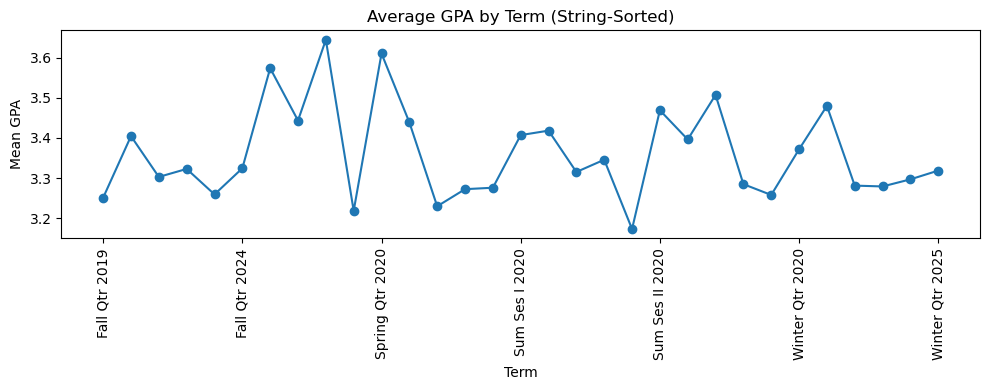

In [6]:
# 3) Explore how GPA changes by term. We'll do a naive groupby by "Term" string.

term_gpa = (df_computable
            .groupby("Term")["enhanced_calculated_gpa"]
            .mean()
            .sort_index())  # sort by string

print("Average GPA by Term:")
display(term_gpa)

plt.figure(figsize=(10,4))
term_gpa.plot(kind='line', marker='o')
plt.title("Average GPA by Term (String-Sorted)")
plt.xlabel("Term")
plt.ylabel("Mean GPA")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# NOTE: If Terms are named "Fall Qtr 2023", "Spring Qtr 2023" etc.,
# the string sort may not reflect chronological order perfectly.
# Future improvement: parse them into (year, season) tuples or custom ordering.

Courses with highest fraction of A-range (on average):


Course
MATH 240C    1.0
MUS 95JC     1.0
MAE 170      1.0
MAE 94       1.0
MATH 200C    1.0
MATH 201A    1.0
MATH 250A    1.0
MATH 250B    1.0
MUS 14       1.0
MUS 5        1.0
Name: frac_A_range, dtype: float64


Courses with lowest fraction of A-range:


Course
COGS 152    0.176471
PHYS 4D     0.173913
SE 142      0.166667
MATH 163    0.151515
MATH 2      0.131579
SOCI 123    0.120513
MGT 132     0.088889
USP 151     0.078947
BIPN 140    0.071429
SE 110A     0.052632
Name: frac_A_range, dtype: float64

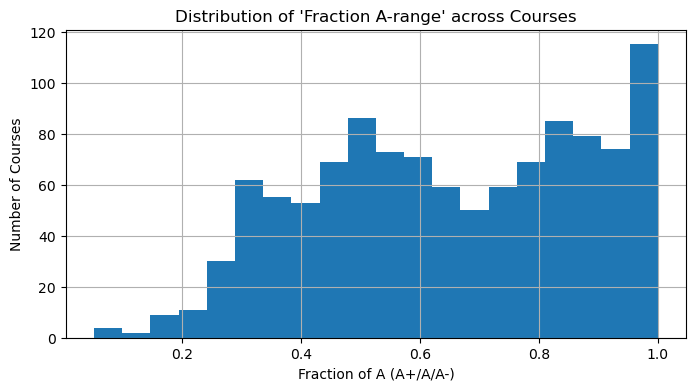

In [7]:
# 4) Examine letter distributions to see proportion of A/B/C/F.
# We assume 'enhanced_grade_dict' is a dict of { 'a': count, 'b': count, ... } in each row.

# Example: Let's compute the fraction of 'A' range (including A+, A, A-) for each course
# We'll define a small helper function:

def fraction_of_A(grade_dict):
    # sum(A+, A, A-) / sum(all standard letters)
    a_letters = ["a+", "a", "a-"]
    total = 0
    a_sum = 0
    for letter, cnt in grade_dict.items():
        total += cnt
        if letter in a_letters:
            a_sum += cnt
    if total == 0:
        return None
    return a_sum / total

df_computable["frac_A_range"] = df_computable["enhanced_grade_dict"].apply(fraction_of_A)

# Now group by course to find average fraction of A-range
course_A_fraction = (df_computable
                     .groupby("Course")["frac_A_range"]
                     .mean()
                     .sort_values(ascending=False))

print("Courses with highest fraction of A-range (on average):")
display(course_A_fraction.head(10))

print("\nCourses with lowest fraction of A-range:")
display(course_A_fraction.tail(10))

# We can do a histogram of fraction A-range across courses:
plt.figure(figsize=(8,4))
course_A_fraction.hist(bins=20)
plt.title("Distribution of 'Fraction A-range' across Courses")
plt.xlabel("Fraction of A (A+/A/A-)")
plt.ylabel("Number of Courses")
plt.show()

In [8]:
# Currently, we have no drop data. 
# This cell would do something like:

if "drop_rate" in df.columns:
    # Perform drop analysis...
    print("Analyzing drop rates, skip for now.")
else:
    print("No drop_rate info present. Skipping drop analysis placeholder.")

No drop_rate info present. Skipping drop analysis placeholder.


In [9]:
# Simple Clustering of Courses by GPA Stats

"""
In this cell, we demonstrate how to cluster courses based on their GPA-related metrics.
We'll use KMeans from scikit-learn with an explicit n_init=10 to avoid FutureWarning.
"""

from sklearn.cluster import KMeans

# 1. Build a DataFrame of features for each course
cluster_df = (df_computable
              .groupby("Course")
              .agg({
                  "enhanced_calculated_gpa": ["mean", "std"],
                  "frac_A_range": "mean"
              }))

# Flatten multi-level columns
cluster_df.columns = ["avg_gpa", "std_gpa", "avg_frac_A"]

# Fill any missing values (e.g., if a course had no valid letters or was missing in frac_A_range)
cluster_df = cluster_df.fillna(0)

# 2. Apply KMeans clustering with 3 clusters
#    Setting n_init=10 explicitly to avoid FutureWarning from scikit-learn 1.4
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(cluster_df[["avg_gpa", "std_gpa", "avg_frac_A"]])

# 3. Assign cluster labels back to cluster_df
cluster_df["cluster"] = kmeans.labels_

print("Sample of course clusters:")
display(cluster_df.head(20))

# This grouping can help identify 'types' of courses: e.g., easy GPA, moderate, strict, etc.
# Students can then see which cluster a course belongs to and plan their schedule accordingly.


Sample of course clusters:


,avg_gpa,std_gpa,avg_frac_A,cluster
Course,,,,
AAS 10,3.805709,0.081476,0.878636,1
AAS 11,3.515772,0.083086,0.773875,0
AAS 190,4.000000,0.000000,1.000000,1
ANAR 111,3.125000,0.000000,0.535714,0
ANAR 164,3.627027,0.000000,0.756757,1
ANBI 100,3.929730,0.000000,0.945946,1
ANBI 116,3.510417,0.000000,0.701389,0
ANBI 141,3.189904,0.000000,0.586538,0
ANBI 159,2.372222,0.000000,0.388889,2


# Actionable Insights for Course Selection

1. **Course Difficulty**:  
   - We identified courses with particularly low average GPA (potentially higher difficulty) vs. high average GPA (potentially easier grading).  
   - Looking at the GPA standard deviation helps students see if the course grade distribution is wide or narrow.

2. **Professor Variability**:  
   - Certain professors, especially if they've taught the same course multiple times, might yield significantly different average GPAs.  
   - Students can check for "strict" vs. "lenient" instructors if they want to balance workload/GPA.

3. **Term Effects**:  
   - Some terms show different average GPAs, possibly due to changes in course schedule or instructor assignment.  

4. **Letter Distribution**:  
   - By computing fraction of A (or fraction of F) for each course, students see how frequently top grades are awarded.  
   - A high fraction of A-range might indicate an "easier" grading pattern or a well-prepared cohort.

5. **Clustering**:  
   - Preliminary KMeans grouping could reveal "types" of courses: e.g.,  
     - Cluster 0: High average GPA, high fraction of A-range.  
     - Cluster 1: Medium GPA with moderate letter distribution.  
     - Cluster 2: Low GPA, more challenging?  

6. **Next Steps**:  
   - If we later obtain drop_rate or workload data, we can integrate that into these analyses.  
   - We might also unify course naming or professor naming if there's duplication.  
   - Finally, we could feed these metrics into a multi-factor difficulty scoring system or a prerequisite-based course graph.
